In [ ]:

# Install the required system-level libraries
!apt-get install -y portaudio19-dev

# Install the Python libraries
!pip install pyaudio soundfile librosa

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libportaudio2 libportaudiocpp0
Suggested packages:
  portaudio19-doc
The following NEW packages will be installed:
  libportaudio2 libportaudiocpp0 portaudio19-dev
0 upgraded, 3 newly installed, 0 to remove and 18 not upgraded.
Need to get 188 kB of archives.
After this operation, 927 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libportaudio2 amd64 19.6.0-1.1 [65.3 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libportaudiocpp0 amd64 19.6.0-1.1 [16.1 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 portaudio19-dev amd64 19.6.0-1.1 [106 kB]
Fetched 188 kB in 1s (320 kB/s)
Selecting previously unselected package libportaudio2:amd64.
(Reading database ... 120895 files and directories currently installed.)
Preparing to unpack .../libportaudio2_19.6.0-1.

In [ ]:

!pip install sounddevice

In [33]:
from google.colab import files

# Upload an audio file from your mobile device to Colab
uploaded = files.upload()

# Check the uploaded files
for filename in uploaded.keys():
    print(f'Uploaded file "{filename}" with {len(uploaded[filename])} bytes')


Saving audio_sample1.wav to audio_sample1.wav
Uploaded file "audio_sample1.wav" with 474394 bytes


In [35]:
import librosa

# Replace 'your_audio_file.wav' with the actual file name
audio_sample1 = list(uploaded.keys())[0]
audio_data, sample_rate = librosa.load(audio_sample1, sr=44000)

# You can now work with audio_data and sample_rate in your Colab notebook


Audio Signal Shape: (108953,)


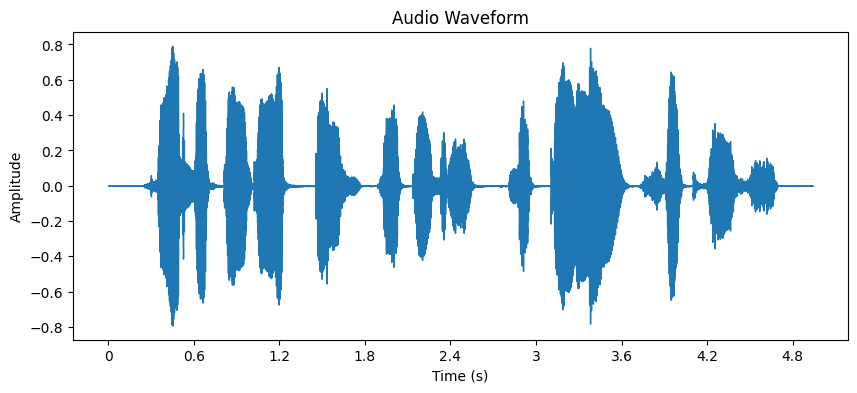

In [39]:
import librosa.display
import matplotlib.pyplot as plt
import librosa
import numpy as np

# Load the uploaded audio file (replace 'your_audio_file.wav' with the actual filename)
audio_file_path = 'audio_sample1.wav'  # Replace with the actual file path
audio_data, sample_rate = librosa.load(audio_file_path)

# Find the shape (length) of the audio signal
audio_shape = audio_data.shape
print(f"Audio Signal Shape: {audio_shape}")

# Plot the audio waveform
plt.figure(figsize=(10, 4))
librosa.display.waveshow(audio_data, sr=sample_rate)
plt.title('Audio Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()


In [42]:
from IPython.display import Audio

# Specify the path to the uploaded audio file (replace 'your_audio_file.wav' with the actual filename)
audio_file_path = 'audio_sample1.wav'  # Replace with the actual file path

# Play the existing uploaded audio file
Audio(audio_file_path)


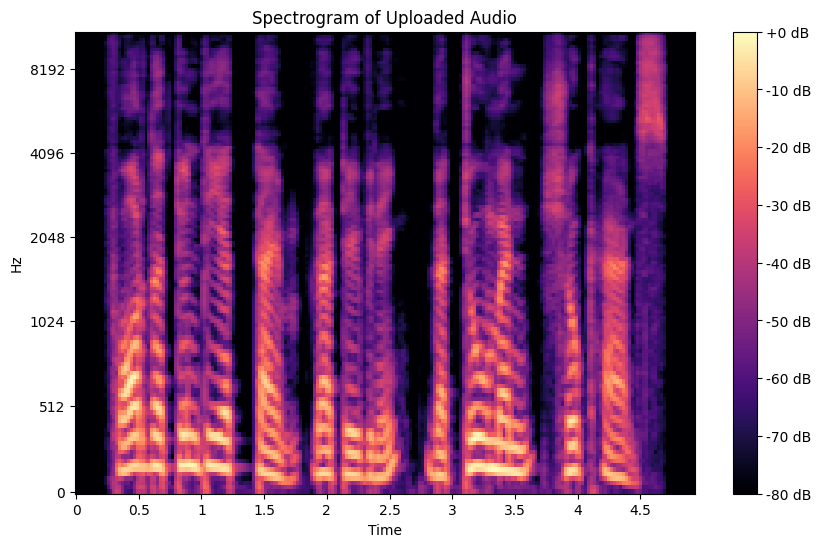

In [43]:
import librosa.display
import matplotlib.pyplot as plt
import librosa

# Specify the path to the uploaded audio file (replace 'your_audio_file.wav' with the actual filename)
audio_file_path = 'audio_sample1.wav'  # Replace with the actual file path

# Load the uploaded audio file
audio_data, sample_rate = librosa.load(audio_file_path)

# Compute the spectrogram
spectrogram = librosa.feature.melspectrogram(y=audio_data, sr=sample_rate)

# Convert power spectrogram to dB scale (optional)
spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)

# Plot the spectrogram
plt.figure(figsize=(10, 6))
librosa.display.specshow(spectrogram_db, sr=sample_rate, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram of Uploaded Audio')
plt.show()


In [50]:
from IPython.display import Audio, display
import speech_recognition as sr

# Specify the path to the uploaded audio file (replace 'your_audio_file.wav' with the actual filename)
audio_file_path = 'audio_sample1.wav'  # Replace with the actual file path

# Create a recognizer instance
recognizer = sr.Recognizer()

# Load the audio file
with sr.AudioFile(audio_file_path) as source:
    audio_data = recognizer.record(source)

# Play the audio
display(Audio(audio_file_path))

# Perform speech recognition on the audio
try:
    text = recognizer.recognize_google(audio_data)  # You can choose another recognizer, like 'recognize_sphinx' for offline recognition
    print("Transcribed text:")
    print(text)
except sr.UnknownValueError:
    print("Could not understand the audio")
except sr.RequestError as e:
    print(f"Could not request results; {e}")


Transcribed text:
for the 20th time that evening the two men shake hands


In [ ]:
!pip install Levenshtein

Transcribed text:
for the 20th time that evening the two men shake hands
Word Error Rate (WER): 0.00%


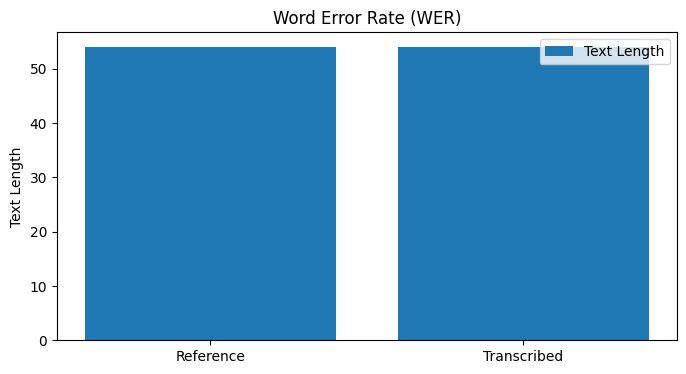

In [55]:
import speech_recognition as sr
import Levenshtein
import matplotlib.pyplot as plt

# Specify the path to the reference text (ground truth)
reference_text = "for the 20th time that evening the two men shake hands"#TEXT WHICH IS EXTRACTED FROM AUDIO

# Specify the path to the uploaded audio file (replace 'your_audio_file.wav' with the actual filename)
audio_file_path = 'audio_sample1.wav'  # Replace with the actual file path

# Create a recognizer instance
recognizer = sr.Recognizer()

# Load the audio file
with sr.AudioFile(audio_file_path) as source:
    audio_data = recognizer.record(source)

# Perform speech recognition on the audio
try:
    transcribed_text = recognizer.recognize_google(audio_data)  # You can choose another recognizer, like 'recognize_sphinx' for offline recognition
    print("Transcribed text:")
    print(transcribed_text)

    # Calculate Word Error Rate (WER)
    wer = Levenshtein.distance(reference_text.split(), transcribed_text.split()) / len(reference_text.split())

    print(f"Word Error Rate (WER): {wer * 100:.2f}%")

    # Visualize WER
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.bar(['Reference', 'Transcribed'], [len(reference_text), len(transcribed_text)], label='Text Length')
    ax.set_ylabel('Text Length')
    ax.set_title('Word Error Rate (WER)')
    ax.legend()
    plt.show()

except sr.UnknownValueError:
    print("Could not understand the audio")
except sr.RequestError as e:
    print(f"Could not request results; {e}")
